https://github.com/ehfahad/Comparative-Analysis-of-RNNs-in-Stock-Price-Prediction

In [ ]:
#Impor Library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM,SimpleRNN,GRU,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
import keras.backend as K
#from keras.callbacks import EarlyStopping
from keras import optimizers
from tensorflow.keras.optimizers import Adamax,Adam, RMSprop 
#from keras.models import load_model
from keras.utils.vis_utils import plot_model
import timeit
from sklearn.metrics import make_scorer, r2_score, confusion_matrix, mean_squared_error
from sklearn import metrics
from math import sqrt

# Tampilan layar
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

In [ ]:
#Ambil Data
df = pd.read_csv("orcl.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
df.to_pickle('dataset.pkl')   
df = pd.read_pickle('dataset.pkl') 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5044 entries, 2000-06-30 to 2020-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.8 KB


In [ ]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df = df.resample('5D').agg(agg_dict)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,54.799999,56.430000,54.500000,55.939999,55.704502,1.740720e+07
2020-07-05,56.200001,57.799999,55.990002,57.529999,57.287807,1.420415e+07
2020-07-10,57.470001,57.840000,56.480000,57.200001,57.200001,1.469723e+07
2020-07-15,57.419998,57.840000,54.759998,54.900002,54.900002,1.123163e+07
2020-07-20,54.880001,55.514999,54.695000,55.450001,55.450001,9.410108e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2000-06-30 to 2020-07-20
Freq: 5D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1466 non-null   float64
 1   High       1466 non-null   float64
 2   Low        1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Adj Close  1466 non-null   float64
 5   Volume     1466 non-null   float64
dtypes: float64(6)
memory usage: 120.2 KB


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1466, 6)
Null Value Present:  False


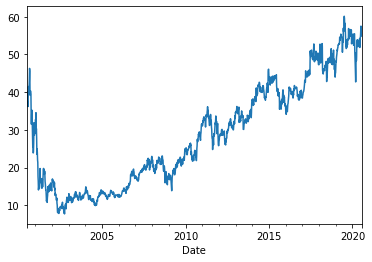

In [ ]:
#Plot the True Adj Close Value
df["Close"].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = StandardScaler()# standar scaler lebih baik
#scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2000-06-30,0.824371,0.914391,0.824959,0.569240
2000-07-05,0.696241,0.669944,0.565994,1.664611
2000-07-10,0.617564,0.634388,0.543277,0.490002
2000-07-15,0.642291,0.683278,0.611426,0.055063
2000-07-20,0.624308,0.718833,0.675032,0.258420


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for Model
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#Rencana Model
mod = 'LSTM'
jml_epochs= 300
input_optimasi = 'Adamax'
input_lr = '0001'

#Set optimizer
if input_lr == '01':
  lr=0.1
elif input_lr == '001':
  lr=0.01
elif input_lr == '0001':
  lr=0.001

if input_optimasi == 'Adamax':
  opt = Adamax(learning_rate=lr)
elif input_optimasi == 'Adam':
  opt = Adam(learning_rate=lr)
elif input_optimasi == 'RMSprop':
  opt = RMSprop(learning_rate=lr)

model = Sequential()
model.add(LSTM(32, input_dim=len(features), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae','mse'])
model.summary()
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Training

start = timeit.default_timer()
history=model.fit(X_train, y_train, epochs=jml_epochs, batch_size=16, verbose=1, shuffle=False)
stop = timeit.default_timer()

Epoch 1/300
84/84 [==============================] - 2s 4ms/step - loss: 829.6906 - mae: 26.4296 - mse: 829.6906
Epoch 2/300
84/84 [==============================] - 0s 4ms/step - loss: 816.2787 - mae: 26.1573 - mse: 816.2787
Epoch 3/300
84/84 [==============================] - 0s 4ms/step - loss: 804.2023 - mae: 25.9245 - mse: 804.2023
Epoch 4/300
84/84 [==============================] - 0s 4ms/step - loss: 792.1036 - mae: 25.6961 - mse: 792.1036
Epoch 5/300
84/84 [==============================] - 0s 4ms/step - loss: 779.6797 - mae: 25.4627 - mse: 779.6797
Epoch 6/300
84/84 [==============================] - 0s 4ms/step - loss: 766.6296 - mae: 25.2157 - mse: 766.6296
Epoch 7/300
84/84 [==============================] - 0s 4ms/step - loss: 752.6367 - mae: 24.9439 - mse: 752.6367
Epoch 8/300
84/84 [==============================] - 0s 4ms/step - loss: 737.5620 - mae: 24.6411 - mse: 737.5620
Epoch 9/300
84/84 [==============================] - 0s 4ms/step - loss: 721.2673 - mae: 24.3013

In [ ]:
#simpan model
modelname = mod+str(jml_epochs)+input_optimasi+input_lr+".h5" 
model.save(modelname)
modelname

'LSTM300Adamax0001.h5'

In [ ]:
#Model Prediction
y_pred= model.predict(X_test)

In [ ]:
print ('R Squared =',r2_score(y_test, y_pred))
ORCL_R2_MODEL = r2_score(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
ORCL_MAE_MODEL = metrics.mean_absolute_error(y_test, y_pred)

print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
ORCL_MAPE_MODEL = metrics.mean_absolute_percentage_error(y_test, y_pred)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
ORCL_RMSE_MODEL = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

R Squared = 0.9077605412286919
Mean Absolute Error: 0.781383221356614
Mean Absolute Percentage Error: 0.015067621728320178
Root Mean Squared Error: 1.0321564352847334


In [ ]:
from prettytable import PrettyTable
waktu = stop - start
nmtabel = PrettyTable(["Model","Epoch","Lr","Opt","R2","MAE","MAPE","RMSE","Waktu"])
nmtabel.add_row([mod,jml_epochs,input_lr,input_optimasi,'{:.2f}'.format(ORCL_R2_MODEL), '{:.2f}'.format(ORCL_MAE_MODEL), '{:.2f}'.format(ORCL_MAPE_MODEL), '{:.2f}'.format(ORCL_RMSE_MODEL),'{:.0f}'.format(waktu)])
#nmtabel.add_row(["5","Paper Acuan","ORCL","LSTM","100","01","Adam","0.90153", "0.98621","1.97875","1.39695","-"])
print(nmtabel)

+-------+-------+------+--------+------+------+------+------+-------+
| Model | Epoch |  Lr  |  Opt   |  R2  | MAE  | MAPE | RMSE | Waktu |
+-------+-------+------+--------+------+------+------+------+-------+
|  LSTM |  300  | 0001 | Adamax | 0.91 | 0.78 | 0.02 | 1.03 |  105  |
+-------+-------+------+--------+------+------+------+------+-------+


In [ ]:
#clear session
K.clear_session()